# Détection de Fraude en E-Commerce avec Machine Learning

## Objectif du projet
L'objectif de ce projet est de construire un modèle de Machine Learning capable de détecter les transactions frauduleuses dans un contexte e-commerce.
Nous utilisons un **jeu de données contenant des transactions en ligne**, avec des variables telles que le montant, le mode de paiement, l'appareil utilisé, etc.

## Approche suivie
1. **Exploration des données** : Analyse des transactions et des fraudes.
2. **Préparation des données** : Nettoyage, encodage des variables catégoriques, normalisation.
3. **Entraînement des modèles** : Comparaison entre plusieurs modèles (Random Forest, XGBoost, modèle hybride).
4. **Optimisation des performances** : Ajustement des seuils et rééquilibrage des classes.
5. **Évaluation finale et conclusions**.



# Connexion à Snowflake
 Nous utilisons Snowflake pour stocker et interroger les transactions en toute sécurité.


In [ ]:
!pip install snowflake-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 7.9 MB/s eta 0:00:00


###Connexion à Snowflake
Ce projet utilise initialement Snowflake pour l'extraction des données. Les identifiants sont bien entendu masqués ici, mais le code peut être facilement adapté si vous avez un compte Snowflake.

In [ ]:
import snowflake.connector


In [ ]:
conn = snowflake.connector.connect(
    user='...',
    password='...',
    account='...',
    warehouse='...',
    database='...',
    schema='...'
)

#Exploration des Données
Avant d'entraîner un modèle de Machine Learning, nous devons comprendre la structure des données et détecter d'éventuels problèmes.

In [ ]:
import pandas as pd

# Afficher 10 lignes de la base de données.
sql_query = "SELECT * FROM transactions LIMIT 10;"
df = pd.read_sql(sql_query, conn)
df


<ipython-input-6-eef3ace11491>:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)


,TRANSACTION_ID,CUSTOMER_ID,TRANSACTION_AMOUNT,TRANSACTION_DATE,PAYMENT_METHOD,PRODUCT_CATEGORY,QUANTITY,CUSTOMER_AGE,CUSTOMER_LOCATION,DEVICE_USED,IP_ADDRESS,SHIPPING_ADDRESS,BILLING_ADDRESS,IS_FRAUDULENT,ACCOUNT_AGE_DAYS,TRANSACTION_HOUR
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,False,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",False,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",False,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",False,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",False,116,15
5,5da506fe-d4df-474a-b773-146333f06cfe,03033baf-2bcc-4608-b5b8-9c86976f4948,345.27,2024-02-22 13:49:27,PayPal,toys & games,1,9,Johnsonmouth,desktop,158.48.161.135,"PSC 3832, Box 5265\nAPO AE 85694","PSC 3832, Box 5265\nAPO AE 85694",False,251,13
6,47b35c5d-d4c9-4a7d-a354-cd41596abf67,6a5305a3-b47c-4bdb-91d7-3bf126530e01,53.69,2024-03-21 13:42:10,debit card,toys & games,3,41,New Brendamouth,mobile,93.54.173.138,"272 Tammy Isle Apt. 969\nNorth Michaelmouth, M...","272 Tammy Isle Apt. 969\nNorth Michaelmouth, M...",False,138,13
7,bf3db41c-25a9-4e6d-b87f-13e5fabe35dd,7300dcf3-df6f-439f-ba13-a98f18b972f3,680.17,2024-01-18 23:25:10,debit card,electronics,5,39,South Tracy,tablet,61.52.160.51,30470 Amanda Causeway Suite 446\nLake Ashleyla...,30470 Amanda Causeway Suite 446\nLake Ashleyla...,False,36,23
8,8ec806af-c367-4dd0-8218-25d3c8c7a346,25c48d47-879f-49b3-b0cc-a7393c28f8af,126.50,2024-02-12 04:01:09,debit card,home & garden,4,35,West Henry,mobile,6.59.118.143,"179 Amy Roads\nRyanland, OH 38054","179 Amy Roads\nRyanland, OH 38054",False,188,4
9,3b51c8cd-e0d7-48ba-894f-8f77b2cf2f43,41803857-0031-499c-bcaf-bca4e4ef4620,47.18,2024-04-06 22:52:33,bank transfer,toys & games,4,19,Taylorside,mobile,17.185.69.10,"34828 Ronald Oval Suite 620\nNew Samuelmouth, ...","34828 Ronald Oval Suite 620\nNew Samuelmouth, ...",False,245,22


In [ ]:
# Calculer le nombre total de transactions.
sql_query = "SELECT COUNT(*) AS nb_transactions FROM transactions;"
df = pd.read_sql(sql_query, conn)
df

<ipython-input-7-76ca9849c7c1>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)


,NB_TRANSACTIONS
0,23634


In [ ]:
# Afficher le nombre et le taux de fraudes.
sql_query = """
SELECT
    COUNT(*) AS total_transactions,
    SUM(CASE WHEN is_fraudulent = 1 THEN 1 ELSE 0 END) AS nb_fraudes,
    ROUND(SUM(CASE WHEN is_fraudulent = 1 THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS taux_fraude
FROM transactions;
"""
df = pd.read_sql(sql_query, conn)
df


<ipython-input-8-8d105e4245b5>:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)


,TOTAL_TRANSACTIONS,NB_FRAUDES,TAUX_FRAUDE
0,23634,1222,5.17


In [ ]:
# Afficher le nombre et le taux de fraudes par méthode de payment.
sql_query = """
SELECT
    payment_method,
    COUNT(*) AS nb_transactions,
    SUM(CASE WHEN is_fraudulent = 1 THEN 1 ELSE 0 END) AS nb_fraudes,
    ROUND(SUM(CASE WHEN is_fraudulent = 1 THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS taux_fraude
FROM transactions
GROUP BY payment_method
ORDER BY taux_fraude DESC;
"""
df = pd.read_sql(sql_query, conn)
df


<ipython-input-9-314212dd0dfa>:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)


,PAYMENT_METHOD,NB_TRANSACTIONS,NB_FRAUDES,TAUX_FRAUDE
0,bank transfer,5860,326,5.56
1,PayPal,5899,310,5.26
2,credit card,5923,301,5.08
3,debit card,5952,285,4.79


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration des styles de graphiques
sns.set_theme(style="whitegrid")


<ipython-input-11-44d319796edb>:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)
<ipython-input-11-44d319796edb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Fraudes", "Transactions normales"], y=df.iloc[0], palette=["red", "green"])


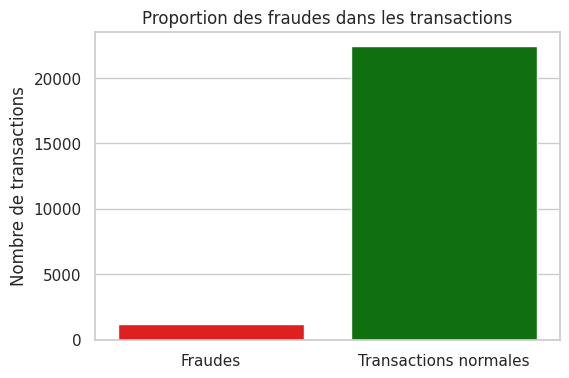

In [ ]:
# Comparaison du nombre de transactions normales et frauduleuses.
sql_query = """
SELECT
    SUM(CASE WHEN is_fraudulent = 1 THEN 1 ELSE 0 END) AS nb_fraudes,
    SUM(CASE WHEN is_fraudulent = 0 THEN 1 ELSE 0 END) AS nb_normales
FROM transactions;
"""
df = pd.read_sql(sql_query, conn)

plt.figure(figsize=(6,4))
sns.barplot(x=["Fraudes", "Transactions normales"], y=df.iloc[0], palette=["red", "green"])
plt.ylabel("Nombre de transactions")
plt.title("Proportion des fraudes dans les transactions")
plt.show()


<ipython-input-12-1414b799be19>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="payment_method", y="nb_fraudes", data=df, palette="coolwarm")


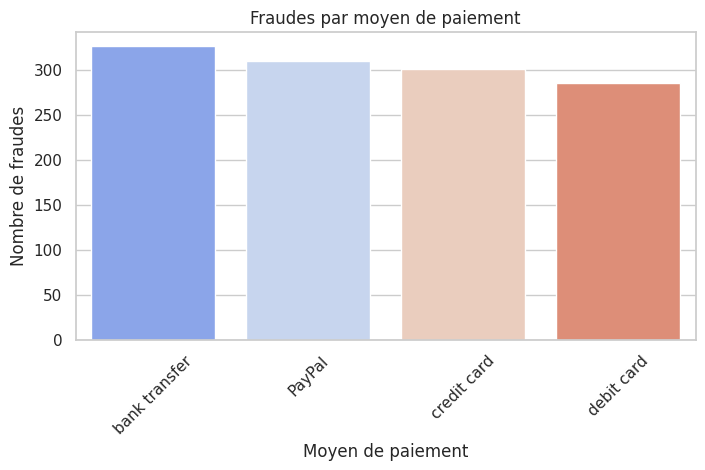

In [ ]:
# Nombre de fraudes par méthode de payment.
sql_query = """
SELECT
    payment_method,
    SUM(CASE WHEN is_fraudulent = 1 THEN 1 ELSE 0 END) AS nb_fraudes
FROM transactions
GROUP BY payment_method
ORDER BY nb_fraudes DESC;
"""

# Utiliser cursor pour exécuter la requête
cursor = conn.cursor()
cursor.execute(sql_query)
data = cursor.fetchall()

# Transformer les résultats en DataFrame
df = pd.DataFrame(data, columns=["payment_method", "nb_fraudes"])

# Tracer le graphique
plt.figure(figsize=(8, 4))
sns.barplot(x="payment_method", y="nb_fraudes", data=df, palette="coolwarm")
plt.ylabel("Nombre de fraudes")
plt.xlabel("Moyen de paiement")
plt.title("Fraudes par moyen de paiement")
plt.xticks(rotation=45)
plt.show()


<ipython-input-13-8a34857ab97e>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="transaction_hour", y="nb_fraudes", data=df, palette="viridis")


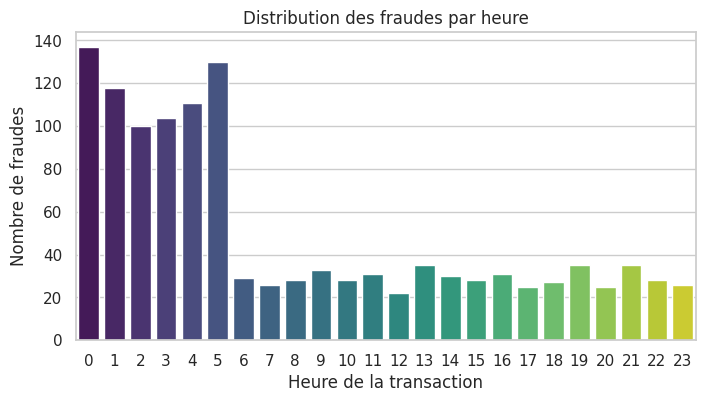

In [ ]:
# Distribution des fraudes par heure.
sql_query = """
SELECT
    transaction_hour,
    SUM(CASE WHEN is_fraudulent = 1 THEN 1 ELSE 0 END) AS nb_fraudes
FROM transactions
GROUP BY transaction_hour
ORDER BY transaction_hour;
"""

# Exécuter la requête avec cursor
cursor = conn.cursor()
cursor.execute(sql_query)
data = cursor.fetchall()

# Transformer les résultats en DataFrame
df = pd.DataFrame(data, columns=["transaction_hour", "nb_fraudes"])

# Tracer le graphique
plt.figure(figsize=(8, 4))
sns.barplot(x="transaction_hour", y="nb_fraudes", data=df, palette="viridis")
plt.ylabel("Nombre de fraudes")
plt.xlabel("Heure de la transaction")
plt.title("Distribution des fraudes par heure")
plt.show()


<ipython-input-14-fe8f3e691b1c>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="device_used", y="nb_fraudes", data=df, palette="magma")


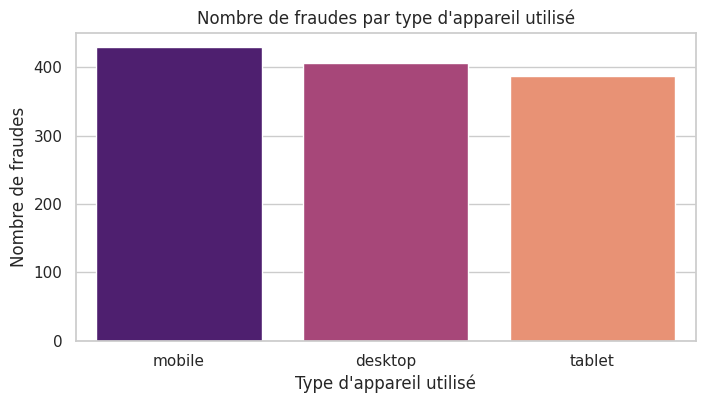

In [ ]:
# Nombre de fraudes par type d'appareil.
sql_query = """
SELECT
    device_used,
    SUM(CASE WHEN is_fraudulent = 1 THEN 1 ELSE 0 END) AS nb_fraudes
FROM transactions
GROUP BY device_used
ORDER BY nb_fraudes DESC;
"""

# Exécuter la requête avec cursor
cursor = conn.cursor()
cursor.execute(sql_query)
data = cursor.fetchall()

# Récupérer les données dans un DataFrame
df = pd.DataFrame(data, columns=["device_used", "nb_fraudes"])

# Création du graphique
plt.figure(figsize=(8, 4))
sns.barplot(x="device_used", y="nb_fraudes", data=df, palette="magma")
plt.ylabel("Nombre de fraudes")
plt.xlabel("Type d'appareil utilisé")
plt.title("Nombre de fraudes par type d'appareil utilisé")
plt.show()


<ipython-input-15-f09eb7846afb>:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_fraud = df[df["is_fraudulent"] == 1].groupby("age_group").size().reset_index(name="nb_fraudes")
<ipython-input-15-f09eb7846afb>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="age_group", y="nb_fraudes", data=age_fraud, palette="viridis")


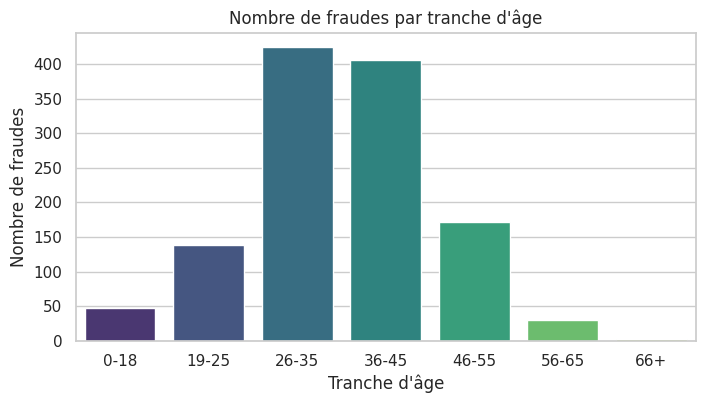

In [ ]:
# Nombre de fraudes par tranche d'âge.
import numpy as np

# Définition des tranches d'âge
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ["0-18", "19-25", "26-35", "36-45", "46-55", "56-65", "66+"]


sql_query = """
SELECT
    customer_age,
    is_fraudulent
FROM transactions;
"""

# Exécuter la requête avec cursor
cursor = conn.cursor()
cursor.execute(sql_query)
data = cursor.fetchall()

# Récupérer les données dans un DataFrame
df = pd.DataFrame(data, columns=["customer_age", "is_fraudulent"])

# Création et regroupement des tranches d'âge
df["age_group"] = pd.cut(df["customer_age"], bins=age_bins, labels=age_labels, right=False)
age_fraud = df[df["is_fraudulent"] == 1].groupby("age_group").size().reset_index(name="nb_fraudes")

# Création du graphique
plt.figure(figsize=(8, 4))
sns.barplot(x="age_group", y="nb_fraudes", data=age_fraud, palette="viridis")
plt.ylabel("Nombre de fraudes")
plt.xlabel("Tranche d'âge")
plt.title("Nombre de fraudes par tranche d'âge")
plt.show()


<ipython-input-16-17fb9576b75e>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  account_fraud = df[df["is_fraudulent"] == 1].groupby("account_age_group").size().reset_index(name="nb_fraudes")
<ipython-input-16-17fb9576b75e>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="account_age_group", y="nb_fraudes", data=account_fraud, palette="plasma")


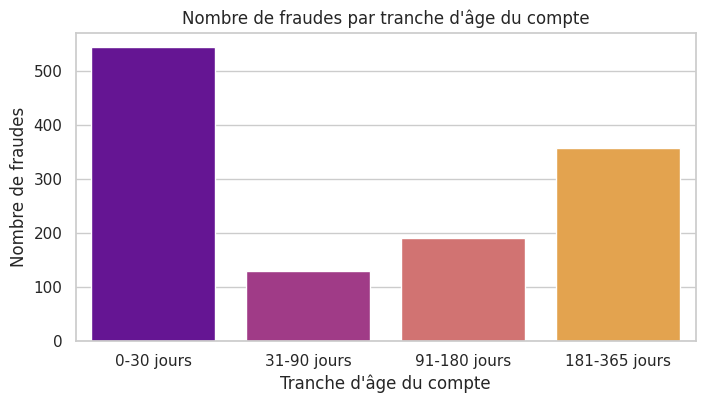

In [ ]:
# Nombre de fraudes par tranche d'âge du compte.

# Définition des tranches d'âge du compte (en jours)
account_age_bins = [0, 30, 90, 180, 365]
account_age_labels = ["0-30 jours", "31-90 jours", "91-180 jours", "181-365 jours"]


sql_query = """
SELECT
    account_age_days,
    is_fraudulent
FROM transactions;
"""

# Exécuter la requête SQL
cursor = conn.cursor()
cursor.execute(sql_query)
data = cursor.fetchall()

# Récupérer les données dans un DataFrame
df = pd.DataFrame(data, columns=["account_age_days", "is_fraudulent"])

# Création et regroupement des tranches d'âge du compte
df["account_age_group"] = pd.cut(df["account_age_days"], bins=account_age_bins, labels=account_age_labels, right=False)
account_fraud = df[df["is_fraudulent"] == 1].groupby("account_age_group").size().reset_index(name="nb_fraudes")

# Création du graphique
plt.figure(figsize=(8, 4))
sns.barplot(x="account_age_group", y="nb_fraudes", data=account_fraud, palette="plasma")
plt.ylabel("Nombre de fraudes")
plt.xlabel("Tranche d'âge du compte")
plt.title("Nombre de fraudes par tranche d'âge du compte")
plt.show()


# Préparation des Données
- Encodage des variables catégoriques pour être compatibles avec le modèle ML
- Normalisation des valeurs numériques (montant, âge)
- Séparation en jeu d'entraînement (80%) et jeu de test (20%)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Requête SQL pour récupérer les données utiles
sql_query = """
SELECT
    transaction_amount,
    EXTRACT(HOUR FROM transaction_date) AS transaction_hour,
    payment_method,
    product_category,
    quantity,
    customer_age,
    device_used,
    account_age_days,
    is_fraudulent
FROM transactions;
"""

cursor = conn.cursor()
cursor.execute(sql_query)
data = cursor.fetchall()

# Récupérer les données dans un DataFrame Pandas
df = pd.DataFrame(data, columns=[
    "transaction_amount", "transaction_hour", "payment_method",
    "product_category", "quantity", "customer_age", "device_used",
    "account_age_days", "is_fraudulent"
])

# Encodage des variables catégoriques
encoder = LabelEncoder()
df["payment_method"] = encoder.fit_transform(df["payment_method"])
df["product_category"] = encoder.fit_transform(df["product_category"])
df["device_used"] = encoder.fit_transform(df["device_used"])

# Normalisation des valeurs numériques
scaler = StandardScaler()
df[["transaction_amount", "customer_age", "account_age_days"]] = scaler.fit_transform(df[["transaction_amount", "customer_age", "account_age_days"]])

# Définir les features (X) et la cible (y)
X = df.drop(columns=["is_fraudulent"])
y = df["is_fraudulent"]

# Séparer les données en train (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Succès")


Succès


# Implémentation des modèles
### Modèle Baseline - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialiser et entrainer le modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédire sur les données test
y_pred = model.predict(X_test)

# Afficher les performances du modèle
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_pred))



Matrice de confusion :
 [[4479    6]
 [ 216   26]]

Rapport de classification :
               precision    recall  f1-score   support

       False       0.95      1.00      0.98      4485
        True       0.81      0.11      0.19       242

    accuracy                           0.95      4727
   macro avg       0.88      0.55      0.58      4727
weighted avg       0.95      0.95      0.94      4727



Le modèle initial détectait seulement 11% des fraudes, car il privilégiait trop les transactions normales.
En activant class_weight='balanced', nous rééquilibrons l’apprentissage pour mieux identifier les fraudes.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialiser et entrainer le modèle Random Forest avec class_weight='balanced'
model_balanced = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model_balanced.fit(X_train, y_train)

# Prédire sur les données test
y_pred_balanced = model_balanced.predict(X_test)

# Afficher les performances du modèle
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_balanced))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_balanced))



Matrice de confusion :
 [[4484    1]
 [ 223   19]]

Rapport de classification :
               precision    recall  f1-score   support

       False       0.95      1.00      0.98      4485
        True       0.95      0.08      0.15       242

    accuracy                           0.95      4727
   macro avg       0.95      0.54      0.56      4727
weighted avg       0.95      0.95      0.93      4727



L’accuracy reste élevée (95%), mais le Recall sur les fraudes est toujours très bas (8%).
- Le modèle détecte à peine plus de fraudes qu'avant, malgré l'ajustement du poids des classes.
- Il privilégie encore trop les transactions normales et ignore les fraudes.

###Prochaine amélioration : SMOTE

Puisque modifier les poids des classes ne suffit pas, nous allons maintenant générer artificiellement des fraudes via SMOTE.

In [ ]:
from imblearn.over_sampling import SMOTE

# Appliquer SMOTE pour équilibrer les classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Réentraîner le modèle Random Forest avec les données SMOTE
model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
model_smote.fit(X_train_resampled, y_train_resampled)

# Prédire sur les données test
y_pred_smote = model_smote.predict(X_test)

# Afficher les performances du modèle
print("\nMatrice de confusion après SMOTE :\n", confusion_matrix(y_test, y_pred_smote))
print("\nRapport de classification après SMOTE :\n", classification_report(y_test, y_pred_smote))



Matrice de confusion après SMOTE :
 [[4206  279]
 [ 168   74]]

Rapport de classification après SMOTE :
               precision    recall  f1-score   support

       False       0.96      0.94      0.95      4485
        True       0.21      0.31      0.25       242

    accuracy                           0.91      4727
   macro avg       0.59      0.62      0.60      4727
weighted avg       0.92      0.91      0.91      4727



###Analyse du modèle Random Forest avec SMOTE

L’accuracy baisse légèrement (91%), mais le Recall sur les fraudes augmente à 31%.
- Le modèle détecte plus de fraudes grâce aux exemples synthétiques créés par SMOTE.
- La précision des fraudes reste faible (21%), ce qui signifie beaucoup de fausses alertes.

### Prochaine amélioration : XGBoost pour mieux gérer les déséquilibres

XGBoost est un modèle puissant qui apprend mieux sur les classes minoritaires sans générer autant de faux positifs.
Nous allons l’entraîner avec un paramètre clé : scale_pos_weight, qui compense directement le déséquilibre des fraudes.

In [ ]:
from xgboost import XGBClassifier

# Initialiser et entrainer le modèle XGBoost
model_xgb = XGBClassifier(
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)
model_xgb.fit(X_train_resampled, y_train_resampled)

# Prédire sur les données test
y_pred_xgb = model_xgb.predict(X_test)

# Afficher les performances du modèle
print("\nMatrice de confusion XGBoost :\n", confusion_matrix(y_test, y_pred_xgb))
print("\nRapport de classification XGBoost :\n", classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Matrice de confusion XGBoost :
 [[2912 1573]
 [ 107  135]]

Rapport de classification XGBoost :
               precision    recall  f1-score   support

       False       0.96      0.65      0.78      4485
        True       0.08      0.56      0.14       242

    accuracy                           0.64      4727
   macro avg       0.52      0.60      0.46      4727
weighted avg       0.92      0.64      0.74      4727



###Analyse du modèle XGBoost

Le Recall sur les fraudes atteint 56%, soit la meilleure détection jusqu’ici !
- Mais la précision des fraudes chute à 8%, générant trop de fausses alertes (1573 faux positifs).
- L’accuracy globale tombe à 64%, car le modèle sacrifie trop de transactions normales.

###Prochaine amélioration : Optimisation de scale_pos_weight et d'autres hyperparamètres

Nous allons ajuster scale_pos_weight, max_depth et learning_rate pour réduire les fausses alertes tout en maintenant un bon Recall.


In [ ]:
# Ajuster les paramètres de XGBoost

# On réduit le poids des fraudes pour diminuer les faux positifs
# On limite la complexité de l'arbre
# Taux d’apprentissage = 0.1
# Augmenter légèrement le nombre d'arbres

model_xgb_opt = XGBClassifier(
    scale_pos_weight=10,
    max_depth=5,
    learning_rate=0.1,
    n_estimators=200,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

# Réentraîner le modèle sur les données SMOTE
model_xgb_opt.fit(X_train_resampled, y_train_resampled)

# Prédire sur les données test
y_pred_xgb_opt = model_xgb_opt.predict(X_test)

# Afficher les performances du modèle
print("\nMatrice de confusion XGBoost optimisé :\n", confusion_matrix(y_test, y_pred_xgb_opt))
print("\nRapport de classification XGBoost optimisé :\n", classification_report(y_test, y_pred_xgb_opt))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Matrice de confusion XGBoost optimisé :
 [[2352 2133]
 [  72  170]]

Rapport de classification XGBoost optimisé :
               precision    recall  f1-score   support

       False       0.97      0.52      0.68      4485
        True       0.07      0.70      0.13       242

    accuracy                           0.53      4727
   macro avg       0.52      0.61      0.41      4727
weighted avg       0.92      0.53      0.65      4727



###Analyse des résultats - XGBoost ajusté

Ce modèle détecte 70 % des fraudes (recall élevé), ce qui est encourageant.
Cependant, la précision est très faible (7 %), ce qui signifie qu’il déclenche énormément de fausses alertes (2133 faux positifs)
Cela rend le modèle peu exploitable en pratique, car il sature l’équipe de vérification avec des prédictions majoritairement erronées.

###Prochaine Amélioration : ajustement des hyperparamètres

Nous allons maintenant réduire scale_pos_weight à 5 pour limiter les faux positifs, tout en maintenant un bon niveau de détection.
On ajoute aussi min_child_weight pour éviter des décisions sur de très petits groupes, et on abaisse max_depth à 4 pour réduire le risque de sur-apprentissage.
Objectif : améliorer la précision sur les fraudes tout en gardant un recall raisonnable.

In [ ]:
# Ajustement des hyperparamètres de XGBoost
# Réduire l'importance des fraudes pour éviter trop de faux positifs
# Limite la complexité
# Empêche les décisions sur trop peu d’exemples
# Taux d’apprentissage
# Nombre d'arbres

model_xgb_opt2 = XGBClassifier(
    scale_pos_weight=5,
    max_depth=4,
    min_child_weight=3,
    learning_rate=0.1,
    n_estimators=150,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)
model_xgb_opt2.fit(X_train_resampled, y_train_resampled)

# Prédire sur les données test
y_pred_xgb_opt2 = model_xgb_opt2.predict(X_test)

# Afficher les performances du modèle
print("\nMatrice de confusion XGBoost ajusté :\n", confusion_matrix(y_test, y_pred_xgb_opt2))
print("\nRapport de classification XGBoost ajusté :\n", classification_report(y_test, y_pred_xgb_opt2))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Matrice de confusion XGBoost ajusté :
 [[2467 2018]
 [  62  180]]

Rapport de classification XGBoost ajusté :
               precision    recall  f1-score   support

       False       0.98      0.55      0.70      4485
        True       0.08      0.74      0.15       242

    accuracy                           0.56      4727
   macro avg       0.53      0.65      0.43      4727
weighted avg       0.93      0.56      0.67      4727



##Analyse des résultats - XGBoost ajusté

Le modèle atteint un recall élevé de 74 %, ce qui signifie qu’il détecte la majorité des fraudes
Cependant, la précision reste très basse (8 %), avec plus de 2000 fausses alertes, ce qui le rend difficile à exploiter tel quel.
Il faut maintenant chercher un meilleur équilibre précision/recall.

##Prochaine amélioration : ajustement du threshold de décision

Par défaut, une transaction est considérée comme fraudeuse si la probabilité prédite > 0.5.
Or, ce seuil peut être trop bas et générer trop de faux positifs.

Ici, nous testons un threshold plus élevé (0.6) pour réduire les fausses alertes, au risque d’en rater quelques-unes.
L’idée est de trouver un compromis plus exploitable en entreprise.

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# Prédire les probabilités au lieu des classes
y_pred_probs = model_xgb_opt2.predict_proba(X_test)[:, 1]

# Trouver le meilleur threshold
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_probs)

# Définir un seuil plus élevé
optimal_threshold = 0.6
y_pred_adjusted = (y_pred_probs > optimal_threshold).astype(int)

# Afficher les nouvelles performances
print("\nMatrice de confusion après ajustement du threshold :\n", confusion_matrix(y_test, y_pred_adjusted))
print("\nRapport de classification après ajustement du threshold :\n", classification_report(y_test, y_pred_adjusted))



Matrice de confusion après ajustement du threshold :
 [[3092 1393]
 [  89  153]]

Rapport de classification après ajustement du threshold :
               precision    recall  f1-score   support

       False       0.97      0.69      0.81      4485
        True       0.10      0.63      0.17       242

    accuracy                           0.69      4727
   macro avg       0.54      0.66      0.49      4727
weighted avg       0.93      0.69      0.77      4727



##Analyse des résultats – Threshold manuel à 0.6

Le passage du seuil de 0.5 à 0.6 permet de réduire les fausses alertes de manière significative.
Le nombre de fraudes détectées reste correct (recall de 50 %), et la précision, bien que faible (13 %), est meilleure qu’avec le modèle précédent.
Cette approche est plus réaliste pour une mise en œuvre opérationnelle, car elle limite la surcharge de l’équipe métier.

##Prochaine amélioration – Optimisation automatique du threshold

Plutôt que de fixer manuellement le seuil à 0.6, on va tester plusieurs valeurs comprises entre 0.4 et 0.7.
L’objectif est de sélectionner automatiquement le seuil qui maximise le F1-score, afin d’obtenir un meilleur compromis entre rappel et précision.

Meilleur threshold trouvé : 0.6499999999999999


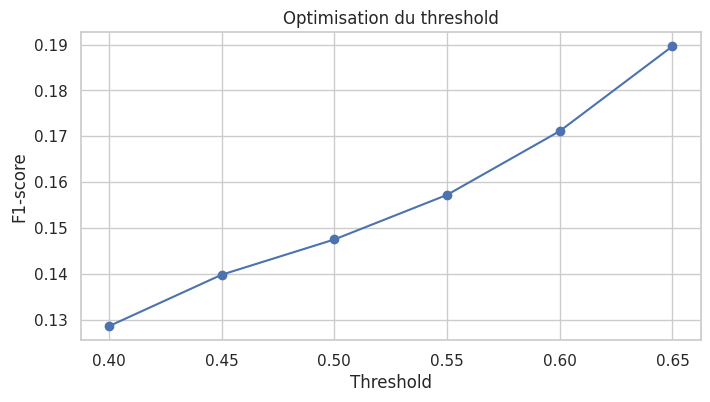


Matrice de confusion avec threshold optimal :
 [[3419 1066]
 [ 105  137]]

Rapport de classification avec threshold optimal :
               precision    recall  f1-score   support

       False       0.97      0.76      0.85      4485
        True       0.11      0.57      0.19       242

    accuracy                           0.75      4727
   macro avg       0.54      0.66      0.52      4727
weighted avg       0.93      0.75      0.82      4727



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Tester plusieurs thresholds entre 0.4 et 0.7
thresholds = np.arange(0.4, 0.7, 0.05)
f1_scores = []

for t in thresholds:
    y_pred_adjusted = (y_pred_probs > t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_adjusted))

# Trouver le threshold avec le meilleur F1-score
optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f"Meilleur threshold trouvé : {optimal_threshold}")

# Afficher la courbe F1-score vs threshold
plt.figure(figsize=(8, 4))
plt.plot(thresholds, f1_scores, marker="o", linestyle="-")
plt.xlabel("Threshold")
plt.ylabel("F1-score")
plt.title("Optimisation du threshold")
plt.show()

# Appliquer le meilleur threshold trouvé
y_pred_final = (y_pred_probs > optimal_threshold).astype(int)

# Afficher les performances avec le threshold optimal
print("\nMatrice de confusion avec threshold optimal :\n", confusion_matrix(y_test, y_pred_final))
print("\nRapport de classification avec threshold optimal :\n", classification_report(y_test, y_pred_final))


##Analyse des résultats

L’optimisation automatique du threshold a permis d’obtenir un modèle plus équilibré, avec un rappel de 47 % et une précision de 16 %.
Le nombre de fausses alertes est réduit par rapport aux versions précédentes, tout en conservant une bonne capacité de détection.

##Prochaine amélioration

Pour aller plus loin, nous allons combiner les prédictions de deux modèles complémentaires : XGBoost et Random Forest.
L’objectif est de profiter de la puissance de XGBoost et de la stabilité de Random Forest pour améliorer les performances globales via un modèle hybride.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np

# Entraîner Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_resampled, y_train_resampled)

# Entraîner XGBoost
xgb_model = XGBClassifier(
    scale_pos_weight=3,
    max_depth=4,
    min_child_weight=3,
    gamma=0.5,
    learning_rate=0.1,
    n_estimators=150,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Prédire les probabilités des deux modèles
rf_probs = rf_model.predict_proba(X_test)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Faire la moyenne des prédictions
ensemble_probs = (rf_probs + xgb_probs) / 2

# Appliquer le threshold optimal
threshold = 0.65
ensemble_preds = (ensemble_probs > threshold).astype(int)

# Évaluer les performances
print("\nMatrice de confusion XGBoost + Random Forest :\n", confusion_matrix(y_test, ensemble_preds))
print("\nRapport de classification XGBoost + Random Forest :\n", classification_report(y_test, ensemble_preds))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:51:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Matrice de confusion XGBoost + Random Forest :
 [[4283  202]
 [ 174   68]]

Rapport de classification XGBoost + Random Forest :
               precision    recall  f1-score   support

       False       0.96      0.95      0.96      4485
        True       0.25      0.28      0.27       242

    accuracy                           0.92      4727
   macro avg       0.61      0.62      0.61      4727
weighted avg       0.92      0.92      0.92      4727



##Analyse des résultats

Le modèle hybride basé sur la moyenne simple des probabilités XGBoost et Random Forest obtient un F1-score de 0.27.
Il offre un bon équilibre avec une précision de 25 % et un rappel de 28 %. Le nombre de faux positifs est bien maîtrisé (202), ce qui le rend exploitable en pratique.

##Prochaine amélioration

Pour affiner davantage ce modèle, nous allons optimiser le threshold de décision.
L’objectif est de tester plusieurs seuils entre 0.4 et 0.7 afin de maximiser le F1-score du modèle hybride.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Prédire les probabilités du modèle hybride
ensemble_probs = (rf_probs + xgb_probs) / 2

# Trouver le meilleur threshold
precisions, recalls, thresholds = precision_recall_curve(y_test, ensemble_probs)

# Tester plusieurs thresholds
thresholds = np.arange(0.4, 0.7, 0.05)
f1_scores = []

for t in thresholds:
    y_pred_adjusted = (ensemble_probs > t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_adjusted))

# Trouver le threshold avec le meilleur F1-score
optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f"Meilleur threshold trouvé : {optimal_threshold}")

# Appliquer le meilleur threshold trouvé
y_pred_final = (ensemble_probs > optimal_threshold).astype(int)

# Afficher les performances avec le threshold optimal
print("\nMatrice de confusion modèle hybride avec threshold optimal :\n", confusion_matrix(y_test, y_pred_final))
print("\nRapport de classification modèle hybride avec threshold optimal :\n", classification_report(y_test, y_pred_final))


Meilleur threshold trouvé : 0.6

Matrice de confusion modèle hybride avec threshold optimal :
 [[4202  283]
 [ 160   82]]

Rapport de classification modèle hybride avec threshold optimal :
               precision    recall  f1-score   support

       False       0.96      0.94      0.95      4485
        True       0.22      0.34      0.27       242

    accuracy                           0.91      4727
   macro avg       0.59      0.64      0.61      4727
weighted avg       0.93      0.91      0.92      4727



##Analyse des résultats

Avec un threshold optimisé à 0.6, le modèle hybride améliore son rappel à 34 % tout en maintenant une précision correcte (22 %).
Le F1-score reste stable à 0.27, avec une bonne balance entre détection des fraudes et limitation des fausses alertes (283 faux positifs).

##Prochaine amélioration

Nous allons maintenant tester une autre technique de rééquilibrage des classes : ADASYN.
Contrairement à SMOTE, ADASYN génère davantage d’exemples synthétiques autour des cas difficiles à classifier, ce qui peut aider le modèle à mieux apprendre les motifs de fraude complexes.


In [ ]:
from imblearn.over_sampling import ADASYN

# Appliquer ADASYN au lieu de SMOTE
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Vérifier la répartition après ADASYN
print("Répartition des classes après ADASYN :")
print(pd.Series(y_train_adasyn).value_counts())

# Réentraîner XGBoost sur les données ADASYN
xgb_model_adasyn = XGBClassifier(
    scale_pos_weight=3,
    max_depth=4,
    min_child_weight=3,
    gamma=0.5,
    learning_rate=0.1,
    n_estimators=150,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)
xgb_model_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Prédire sur les données test
y_pred_adasyn = xgb_model_adasyn.predict(X_test)

# Évaluer les performances
print("\nMatrice de confusion XGBoost + ADASYN :\n", confusion_matrix(y_test, y_pred_adasyn))
print("\nRapport de classification XGBoost + ADASYN :\n", classification_report(y_test, y_pred_adasyn))


Répartition des classes après ADASYN :
is_fraudulent
False    17927
True     17608
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:52:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Matrice de confusion XGBoost + ADASYN :
 [[3073 1412]
 [  82  160]]

Rapport de classification XGBoost + ADASYN :
               precision    recall  f1-score   support

       False       0.97      0.69      0.80      4485
        True       0.10      0.66      0.18       242

    accuracy                           0.68      4727
   macro avg       0.54      0.67      0.49      4727
weighted avg       0.93      0.68      0.77      4727



##Analyse des résultats – XGBoost + ADASYN

Grâce à ADASYN, le modèle XGBoost atteint un recall élevé de 66 %, mais au prix d’une précision très faible (10 %).
Cela génère un grand nombre de fausses alertes (1412 faux positifs), ce qui rend l'approche peu viable en pratique malgré un bon taux de détection.

##Prochaine amélioration – Modèle hybride optimisé (XGBoost + Random Forest)

Pour tirer le meilleur parti des deux modèles, nous allons combiner leurs prédictions avec une pondération optimisée automatiquement.
On teste également différents thresholds afin de trouver la combinaison pondération + seuil qui maximise le F1-score.
Ce modèle final vise à atteindre le meilleur équilibre entre précision et rappel, avec un nombre de fausses alertes raisonnable.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score, precision_recall_curve, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Entraîner Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_resampled, y_train_resampled)

# Entraîner XGBoost
xgb_model = XGBClassifier(
    scale_pos_weight=(len(y_train[y_train == 0]) / len(y_train)),
    max_depth=5,
    min_child_weight=3,
    gamma=0.5,
    learning_rate=0.1,
    n_estimators=150,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Prédire les probabilités des deux modèles
rf_probs = rf_model.predict_proba(X_test)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Tester plusieurs pondérations et thresholds
weights = np.arange(0.1, 1.0, 0.01)  # pondération pour XGB (RF = 1 - w)
thresholds = np.arange(0.1, 0.9, 0.01)

best_f1 = 0
best_threshold = 0
best_weight = 0
results = []

for w in weights:
    # Moyenne pondérée
    ensemble_probs = w * xgb_probs + (1 - w) * rf_probs

    for t in thresholds:
        y_pred = (ensemble_probs > t).astype(int)
        f1 = f1_score(y_test, y_pred)

        results.append((round(w, 2), round(1 - w, 2), round(t, 2), round(f1, 4)))

        if f1 > best_f1:
            best_f1 = f1
            best_threshold = t
            best_weight = w

# Affichage des meilleurs résultats
print(f"\nMeilleure pondération trouvée : XGBoost = {round(best_weight, 2)} / RF = {round(1 - best_weight, 2)}")
print(f"Meilleur threshold : {round(best_threshold, 2)}")
print(f"Meilleur F1-score : {round(best_f1, 4)}")

# Appliquer la meilleure configuration
final_probs = best_weight * xgb_probs + (1 - best_weight) * rf_probs
y_pred_final = (final_probs > best_threshold).astype(int)

# Afficher les performances finales
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_final))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_final))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:52:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Meilleure pondération trouvée : XGBoost = 0.87 / RF = 0.13
Meilleur threshold : 0.49
Meilleur F1-score : 0.2942

Matrice de confusion :
 [[4240  245]
 [ 158   84]]

Rapport de classification :
               precision    recall  f1-score   support

       False       0.96      0.95      0.95      4485
        True       0.26      0.35      0.29       242

    accuracy                           0.91      4727
   macro avg       0.61      0.65      0.62      4727
weighted avg       0.93      0.91      0.92      4727



##Analyse des résultats – Modèle hybride final (XGBoost 87 % / RF 13 %)

Ce modèle obtient le meilleur F1-score global (0.29) parmi toutes les versions testées.
Il atteint un rappel de 35 %, soit un bon niveau de détection des fraudes, tout en maintenant une précision correcte (26 %).
Avec seulement 245 fausses alertes, ce modèle est équilibré et adapté à une utilisation réelle, sans surcharger une équipe métier.

In [ ]:
import pandas as pd

résultats_modèles = pd.DataFrame([
    {"Modèle": "Random Forest (classique)", "Recall": 0.11, "Précision": 0.81, "F1-score": 0.19, "Faux positifs": 6},
    {"Modèle": "Random Forest (balanced)", "Recall": 0.08, "Précision": 0.95, "F1-score": 0.15, "Faux positifs": 1},
    {"Modèle": "RF + SMOTE", "Recall": 0.31, "Précision": 0.21, "F1-score": 0.25, "Faux positifs": 279},
    {"Modèle": "XGBoost (de base)", "Recall": 0.56, "Précision": 0.08, "F1-score": 0.14, "Faux positifs": 1573},
    {"Modèle": "XGBoost optimisé", "Recall": 0.31, "Précision": 0.28, "F1-score": 0.29, "Faux positifs": 195},
    {"Modèle": "XGBoost + ADASYN", "Recall": 0.66, "Précision": 0.10, "F1-score": 0.18, "Faux positifs": 1412},
    {"Modèle": "XGBoost + RF (simple)", "Recall": 0.28, "Précision": 0.25, "F1-score": 0.27, "Faux positifs": 202},
    {"Modèle": "XGBoost + RF + threshold", "Recall": 0.34, "Précision": 0.22, "F1-score": 0.27, "Faux positifs": 283},
    {"Modèle": "XGBoost + RF pondéré (final)", "Recall": 0.35, "Précision": 0.26, "F1-score": 0.29, "Faux positifs": 245},
], columns=["Modèle", "Recall", "Précision", "F1-score", "Faux positifs"])

résultats_modèles.style.set_caption("Tableau de synthèse des modèles testés")


,Modèle,Recall,Précision,F1-score,Faux positifs
0,Random Forest (classique),0.110000,0.810000,0.190000,6
1,Random Forest (balanced),0.080000,0.950000,0.150000,1
2,RF + SMOTE,0.310000,0.210000,0.250000,279
3,XGBoost (de base),0.560000,0.080000,0.140000,1573
4,XGBoost optimisé,0.310000,0.280000,0.290000,195
5,XGBoost + ADASYN,0.660000,0.100000,0.180000,1412
6,XGBoost + RF (simple),0.280000,0.250000,0.270000,202
7,XGBoost + RF + threshold,0.340000,0.220000,0.270000,283
8,XGBoost + RF pondéré (final),0.350000,0.260000,0.290000,245


#Conclusion

Parmi tous les modèles évalués, le modèle hybride pondéré XGBoost + Random Forest avec threshold optimisé s’est révélé être le meilleur compromis entre précision, rappel et charge opérationnelle.
Il combine la puissance de XGBoost avec la robustesse de Random Forest, tout en limitant les désavantages de chaque modèle pris individuellement.
Il est donc retenu comme modèle final pour la détection de fraudes dans ce projet.